# **PROJECT TITLE**:
## **Design and Implementation of Deep Learning Models for Multi-Stock Forecasting and Real-Time Analysis.**

1: Connet note book to google drive for file/data acess

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_path = "/content/drive/MyDrive/deep-learning-stock-forecasting/data/"

2: Install Required Libraries and Import them

In [ ]:
!pip install yfinance ta pandas scikit-learn

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=60274fffb5ee642f1a2e625574efc422a464af400ead407260516a70b864b587
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [ ]:
import yfinance as yf
import pandas as pd
import os

# Make sure the data folder exists in Drive
os.makedirs(project_path, exist_ok=True)

# **Data Collection**

3: Download Stock Data (AAPL, TSLA, GOOGL)

In [ ]:
# Define stock tickers and download data
tickers = ['AAPL', 'TSLA', 'GOOGL']

for ticker in tickers:
    print(f"Downloading {ticker} data...")
    df = yf.download(ticker, start="2014-01-01", end="2024-12-31")
    file_path = f"{project_path}{ticker}_stock_data.csv"
    df.to_csv(file_path)
    print(f"{ticker} data saved to: {file_path}\n")


/tmp/ipython-input-8-2166301136.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-8-2166301136.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

AAPL data saved to: /content/drive/MyDrive/deep-learning-stock-forecasting/data/AAPL_stock_data.csv



TSLA data saved to: /content/drive/MyDrive/deep-learning-stock-forecasting/data/TSLA_stock_data.csv



/tmp/ipython-input-8-2166301136.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


GOOGL data saved to: /content/drive/MyDrive/deep-learning-stock-forecasting/data/GOOGL_stock_data.csv



4. Show the data structure and first few rows

In [ ]:
import pandas as pd
# Load AAPL as an example
df = pd.read_csv("/content/drive/MyDrive/deep-learning-stock-forecasting/data/AAPL_stock_data.csv")

# Show structure and sample
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   2769 non-null   object
 1   Close   2768 non-null   object
 2   High    2768 non-null   object
 3   Low     2768 non-null   object
 4   Open    2768 non-null   object
 5   Volume  2768 non-null   object
dtypes: object(6)
memory usage: 129.9+ KB
None
        Price               Close                High                 Low  \
0      Ticker                AAPL                AAPL                AAPL   
1        Date                 NaN                 NaN                 NaN   
2  2014-01-02   17.19282341003418  17.314046576309632  17.158321968248117   
3  2014-01-03  16.815162658691406  17.210534703918032  16.798066323654336   
4  2014-01-06   16.90686798095703  16.996074758002152  16.585782347619002   

                 Open     Volume  
0                AAPL       AAPL  
1                 NaN     

In [ ]:
df

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2014-01-02,17.19282341003418,17.314046576309632,17.158321968248117,17.27208509413738,234684800
3,2014-01-03,16.815162658691406,17.210534703918032,16.798066323654336,17.184426231497113,392467600
4,2014-01-06,16.90686798095703,16.996074758002152,16.585782347619002,16.70545179731443,412610800
...,...,...,...,...,...,...
2764,2024-12-23,254.6557159423828,255.03479114956258,252.8400883307868,254.15691915529422,40858800
2765,2024-12-24,257.57867431640625,257.58862955018265,254.67565812568793,254.87518901917565,23234700
2766,2024-12-26,258.39666748046875,259.47408555117545,257.0100282923795,257.56867823862046,27237100
2767,2024-12-27,254.9749298095703,258.0774615569102,252.4510193654514,257.20952960207876,42355300


# **Data Cleaning**

In this section, we cleaned the Raw Stock Data (AAPL, TSLA, GOOGL)
by creating a reusable function to Skip the first two “junk” rows, Convert numeric columns properly, Format the Date column and Save the cleaned data as CSVs file

1. Write Cleaning function

In [ ]:
import pandas as pd
import os

# Set project path
data_path = "/content/drive/MyDrive/deep-learning-stock-forecasting/data/"

# Step 1: Cleaning function
def clean_stock_csv(file_path, output_path):
    # Skip the first 2 rows and load the rest
    df = pd.read_csv(file_path, skiprows=2, header=None)

    # set the columns names'
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

    # Convert numeric columns
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Convert date column
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Drop rows with missing values
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)

    # Save cleaned file
    df.to_csv(output_path, index=False)
    print(f"Cleaned and saved: {output_path}")
    return df

2. Apply cleaning to all 3 files

In [ ]:
# Step 2: Apply cleaning to all 3 files
tickers = ['AAPL', 'TSLA', 'GOOGL']

cleaned_dfs = {}

for ticker in tickers:
    raw_file = f"{data_path}{ticker}_stock_data.csv"
    cleaned_file = f"{data_path}{ticker}_clean.csv"
    cleaned_dfs[ticker] = clean_stock_csv(raw_file, cleaned_file)

/tmp/ipython-input-6-2581412166.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Cleaned and saved: /content/drive/MyDrive/deep-learning-stock-forecasting/data/AAPL_clean.csv


/tmp/ipython-input-6-2581412166.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Cleaned and saved: /content/drive/MyDrive/deep-learning-stock-forecasting/data/TSLA_clean.csv


/tmp/ipython-input-6-2581412166.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Cleaned and saved: /content/drive/MyDrive/deep-learning-stock-forecasting/data/GOOGL_clean.csv


3. Preview cleaned file

In [ ]:
# Step 3: Preview one cleaned file (optional)
cleaned_dfs['AAPL']

,Date,Close,High,Low,Open,Volume
0,2014-01-02,17.192823,17.314047,17.158322,17.272085,234684800.0
1,2014-01-03,16.815163,17.210535,16.798066,17.184426,392467600.0
2,2014-01-06,16.906868,16.996075,16.585782,16.705452,412610800.0
3,2014-01-07,16.785952,16.969961,16.720056,16.918986,317209200.0
4,2014-01-08,16.892250,16.957523,16.743986,16.747714,258529600.0
...,...,...,...,...,...,...
2762,2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800.0
2763,2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700.0
2764,2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100.0
2765,2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300.0


# **Data Preprocessing & Feature Engineering**

Before feeding historical stock data into deep learning models, it is crucial to prepare and enrich the dataset through preprocessing and feature engineering. Here we introduce technical indicators including RSI, MACD, EMA, BOLLINGER BAND. These engineered features enrich the dataset by providing additional context about price movements, volatility, and market momentum — all of which are crucial signals in time series forecasting.

Also in this section we normalize our Dataset - Normalizing our features for deep learning model input ensures that all numeric values are on a similar scale so that our models (especially LSTM and Transformers) can learn efficiently and converge faster. Normalizing will helps BiLSTM with gradient stability, Improves convergence and learning consistency for Transformer (TFT/PatchTST), and Prevents large-value features from dominating visualizations during plotting

1.Import Required Libraries

In [ ]:
import pandas as pd
import ta
import os

2.Define a Function to Add Technical Indicators

In [ ]:
def add_technical_indicators(df):
    df = df.copy()

    # Add all standard TA indicators using the `ta` library
    df = ta.add_all_ta_features(
        df,
        open="Open",
        high="High",
        low="Low",
        close="Close",
        volume="Volume",
        fillna=True  # Replace NaNs with fallback values
    )

    return df

3. Apply Indicator to All Cleaned Datasets (AAPL, TSLA, GOOGL)

In [ ]:
data_path = "/content/drive/MyDrive/deep-learning-stock-forecasting/data/"
tickers = ['AAPL', 'TSLA', 'GOOGL']

for ticker in tickers:
    # Load cleaned CSV
    df = pd.read_csv(f"{data_path}{ticker}_clean.csv")

    # Add indicators
    df = add_technical_indicators(df)

    # Save the enriched version
    df.to_csv(f"{data_path}{ticker}_features.csv", index=False)
    print(f"✅ Indicators added and saved for {ticker}")


✅ Indicators added and saved for AAPL
✅ Indicators added and saved for TSLA
✅ Indicators added and saved for GOOGL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 92 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2767 non-null   object 
 1   Close                      2767 non-null   float64
 2   High                       2767 non-null   float64
 3   Low                        2767 non-null   float64
 4   Open                       2767 non-null   float64
 5   Volume                     2767 non-null   float64
 6   volume_adi                 2767 non-null   float64
 7   volume_obv                 2767 non-null   float64
 8   volume_cmf                 2767 non-null   float64
 9   volume_fi                  2767 non-null   float64
 10  volume_em                  2767 non-null   float64
 11  volume_sma_em              2767 non-null   float64
 12  volume_vpt                 2767 non-null   float64
 13  volume_vwap                2767 non-null   float

4. Normalize Features for Model Input



a. Install & Import Libraries

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import os

b. Define Normalization Function

In [ ]:
def normalize_features(df):
    df = df.copy()

    # Exclude Date column from scaling
    date_col = df['Date']
    df = df.drop(columns=['Date'])

    # Apply MinMax scaling
    scaler = MinMaxScaler()
    scaled_array = scaler.fit_transform(df)

    # Rebuild DataFrame with same columns
    df_scaled = pd.DataFrame(scaled_array, columns=df.columns)

    # Reattach Date column
    df_scaled.insert(0, 'Date', date_col)

    return df_scaled

c. Apply to All Feature Files

In [ ]:
data_path = "/content/drive/MyDrive/deep-learning-stock-forecasting/data/"
tickers = ['AAPL', 'TSLA', 'GOOGL']

for ticker in tickers:
    input_file = f"{data_path}{ticker}_features.csv"
    output_file = f"{data_path}{ticker}_normalized.csv"

    df = pd.read_csv(input_file)
    df_scaled = normalize_features(df)
    df_scaled.to_csv(output_file, index=False)
    print(f"✅ Normalized and saved: {output_file}")

✅ Normalized and saved: /content/drive/MyDrive/deep-learning-stock-forecasting/data/AAPL_normalized.csv
✅ Normalized and saved: /content/drive/MyDrive/deep-learning-stock-forecasting/data/TSLA_normalized.csv
✅ Normalized and saved: /content/drive/MyDrive/deep-learning-stock-forecasting/data/GOOGL_normalized.csv


In [ ]:
df_scaled.head()

,Date,Close,High,Low,Open,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
0,2014-01-02,0.017406,0.016697,0.018632,0.017066,0.256087,0.081062,0.063214,0.534398,0.426673,...,0.559729,0.577201,0.427956,0.330952,0.409084,0.329048,0.015384,0.417106,0.450861,0.017406
1,2014-01-03,0.016228,0.016582,0.018145,0.016999,0.231145,0.063886,0.051569,0.000000,0.389160,...,0.555401,0.576150,0.418473,0.320251,0.405864,0.316057,0.014813,0.390953,0.424172,0.016228
2,2014-01-06,0.018015,0.016854,0.018366,0.016711,0.247687,0.077759,0.063930,0.450362,0.403150,...,0.558626,0.576092,0.427437,0.319066,0.402931,0.317217,0.015329,0.457078,0.491278,0.018015
3,2014-01-07,0.021140,0.019797,0.020518,0.018446,0.373976,0.101990,0.081765,0.797732,0.428282,...,0.572620,0.579444,0.458203,0.371330,0.416311,0.383029,0.016998,0.486223,0.520467,0.021140
4,2014-01-08,0.021483,0.020875,0.022292,0.021483,0.323979,0.105073,0.097432,0.765504,0.430157,...,0.584652,0.585048,0.478518,0.389800,0.432572,0.394655,0.018148,0.424567,0.458439,0.021483


# **Exploratory Data Analysis [EDA] + Feature Selection**

In this phase of the project, we take a closer look at the structure and patterns within the stock data using **exploratory data analysis (EDA)** techniques. The goal is to gain insights into the behavior of stock prices over time and understand the relationships between various technical indicators.

EDA helps identify:

* Trends and seasonality in price movements
* Outliers and anomalies
* Highly correlated or redundant features
* The most relevant indicators that contribute to accurate forecasting

We also perform **feature selection** to reduce the dimensionality of the dataset. Since the technical analysis library generated over 90 features, selecting only the most informative ones will:

* Improve model performance
* Reduce overfitting
* Speed up training time

This step includes:

* Visualizations (line charts, heatmaps, pair plots)
* Statistical analysis of feature distributions and relationships
* Correlation analysis to remove multicollinearity

By the end of this Section, we’ll have a refined dataset that is clean, enriched, and optimized for training our deep learning models.


1. Load Normalized Data for AAPL, TSLA, and GOOGL to explore

In [ ]:
import pandas as pd

data_path = "/content/drive/MyDrive/deep-learning-stock-forecasting/data/"

# Load AAPL normalized data
df = pd.read_csv(f"{data_path}AAPL_normalized.csv")

# View structure and sample
print(df.shape)
print(df.columns[:10])  # Show first 10 column names
df.head()

(2767, 92)
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi'],
      dtype='object')


,Date,Close,High,Low,Open,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
0,2014-01-02,0.006828,0.007073,0.007520,0.007765,0.202871,0.071305,0.096188,0.180446,0.468947,...,0.514473,0.474544,0.484992,0.356947,0.445616,0.266239,0.004214,0.517787,0.548931,0.006828
1,2014-01-03,0.005273,0.006649,0.006030,0.007403,0.354252,0.048711,0.064346,0.000000,0.329895,...,0.501250,0.471530,0.453891,0.457162,0.474871,0.375533,0.003495,0.429376,0.460394,0.005273
2,2014-01-06,0.005651,0.005770,0.005151,0.005425,0.373578,0.063349,0.097822,0.428039,0.354831,...,0.494229,0.467517,0.443598,0.538267,0.521952,0.442127,0.003283,0.539738,0.570612,0.005651
3,2014-01-07,0.005153,0.005663,0.005707,0.006307,0.282047,0.053938,0.072086,0.385927,0.365993,...,0.484686,0.462132,0.429431,0.542661,0.560899,0.411741,0.002937,0.489001,0.520320,0.005153
4,2014-01-08,0.005590,0.005612,0.005806,0.005600,0.225748,0.060245,0.093062,0.474172,0.384384,...,0.481272,0.457045,0.432515,0.511613,0.582993,0.348780,0.002939,0.543275,0.574095,0.005590


In [ ]:
import pandas as pd

data_path = "/content/drive/MyDrive/deep-learning-stock-forecasting/data/"

# Load TSLA normalized data
df = pd.read_csv(f"{data_path}TSLA_normalized.csv")

# View structure and sample
print(df.shape)
print(df.columns[:10])  # Show first 10 column names
df.head()

(2767, 92)
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi'],
      dtype='object')


,Date,Close,High,Low,Open,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
0,2014-01-02,0.001524,0.000763,0.001469,0.001329,0.090990,0.041785,0.119944,0.687022,0.362401,...,0.478281,0.486218,0.528857,0.445188,0.483269,0.313938,0.001076,0.490040,0.544088,0.001524
1,2014-01-03,0.001448,0.000723,0.001774,0.001358,0.066195,0.039616,0.116668,0.406729,0.361701,...,0.477269,0.485992,0.527115,0.410973,0.474908,0.271059,0.001028,0.481670,0.535797,0.001448
2,2014-01-06,0.001085,0.000473,0.001274,0.001358,0.077254,0.037923,0.112926,0.332495,0.361260,...,0.471682,0.484564,0.517847,0.399418,0.465395,0.265153,0.000818,0.450216,0.504372,0.001085
3,2014-01-07,0.001420,0.000473,0.001276,0.001017,0.071825,0.040904,0.116440,0.508905,0.361891,...,0.471807,0.483450,0.520265,0.382804,0.453725,0.254090,0.000887,0.527391,0.580727,0.001420
4,2014-01-08,0.001692,0.000933,0.001798,0.001193,0.090572,0.041028,0.120741,0.509906,0.362430,...,0.475586,0.483402,0.528487,0.397485,0.447976,0.284458,0.001054,0.519948,0.573471,0.001692


In [ ]:
import pandas as pd

data_path = "/content/drive/MyDrive/deep-learning-stock-forecasting/data/"

# Load GOOGL normalized data
df = pd.read_csv(f"{data_path}GOOGL_normalized.csv")

# View structure and sample
print(df.shape)
print(df.columns[:10])  # Show first 10 column names
df.head()

(2767, 92)
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi'],
      dtype='object')


,Date,Close,High,Low,Open,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
0,2014-01-02,0.017406,0.016697,0.018632,0.017066,0.256087,0.081062,0.063214,0.534398,0.426673,...,0.559729,0.577201,0.427956,0.330952,0.409084,0.329048,0.015384,0.417106,0.450861,0.017406
1,2014-01-03,0.016228,0.016582,0.018145,0.016999,0.231145,0.063886,0.051569,0.000000,0.389160,...,0.555401,0.576150,0.418473,0.320251,0.405864,0.316057,0.014813,0.390953,0.424172,0.016228
2,2014-01-06,0.018015,0.016854,0.018366,0.016711,0.247687,0.077759,0.063930,0.450362,0.403150,...,0.558626,0.576092,0.427437,0.319066,0.402931,0.317217,0.015329,0.457078,0.491278,0.018015
3,2014-01-07,0.021140,0.019797,0.020518,0.018446,0.373976,0.101990,0.081765,0.797732,0.428282,...,0.572620,0.579444,0.458203,0.371330,0.416311,0.383029,0.016998,0.486223,0.520467,0.021140
4,2014-01-08,0.021483,0.020875,0.022292,0.021483,0.323979,0.105073,0.097432,0.765504,0.430157,...,0.584652,0.585048,0.478518,0.389800,0.432572,0.394655,0.018148,0.424567,0.458439,0.021483


2. Trend Visualization

a. Close Price Plot

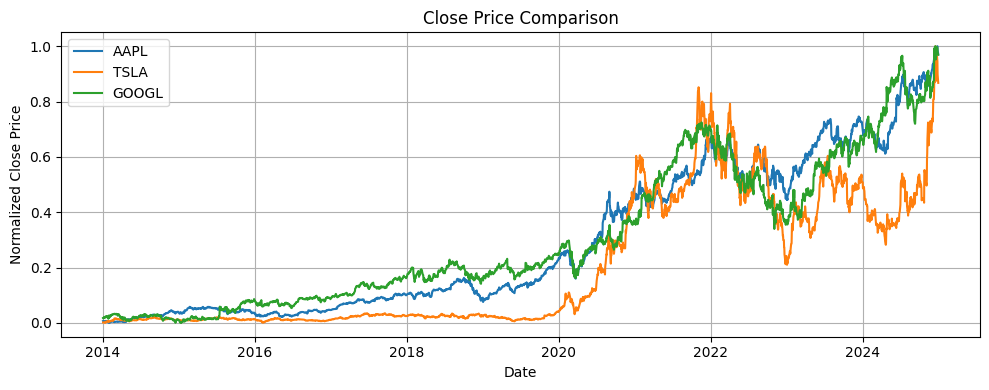

In [ ]:
# Load all 3 normalized datasets
aapl = pd.read_csv(f"{data_path}AAPL_normalized.csv")
tsla = pd.read_csv(f"{data_path}TSLA_normalized.csv")
googl = pd.read_csv(f"{data_path}GOOGL_normalized.csv")

# Convert Date
for df in [aapl, tsla, googl]:
    df['Date'] = pd.to_datetime(df['Date'])

# Plot Close Prices
plt.figure(figsize=(10, 4))
plt.plot(aapl['Date'], aapl['Close'], label='AAPL')
plt.plot(tsla['Date'], tsla['Close'], label='TSLA')
plt.plot(googl['Date'], googl['Close'], label='GOOGL')
plt.title("Close Price Comparison")
plt.xlabel("Date")
plt.ylabel("Normalized Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

b. RSI plot

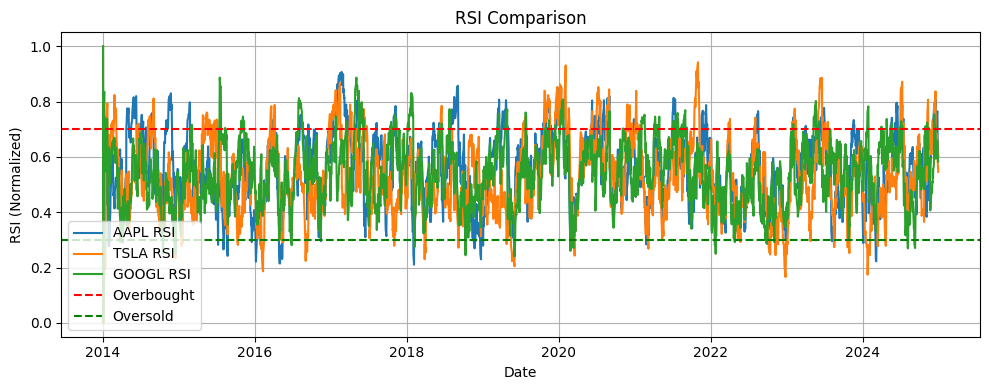

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(aapl['Date'], aapl['momentum_rsi'], label='AAPL RSI')
plt.plot(tsla['Date'], tsla['momentum_rsi'], label='TSLA RSI')
plt.plot(googl['Date'], googl['momentum_rsi'], label='GOOGL RSI')
plt.axhline(0.7, color='red', linestyle='--', label='Overbought')
plt.axhline(0.3, color='green', linestyle='--', label='Oversold')
plt.title("RSI Comparison")
plt.xlabel("Date")
plt.ylabel("RSI (Normalized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

c. MACD Plot

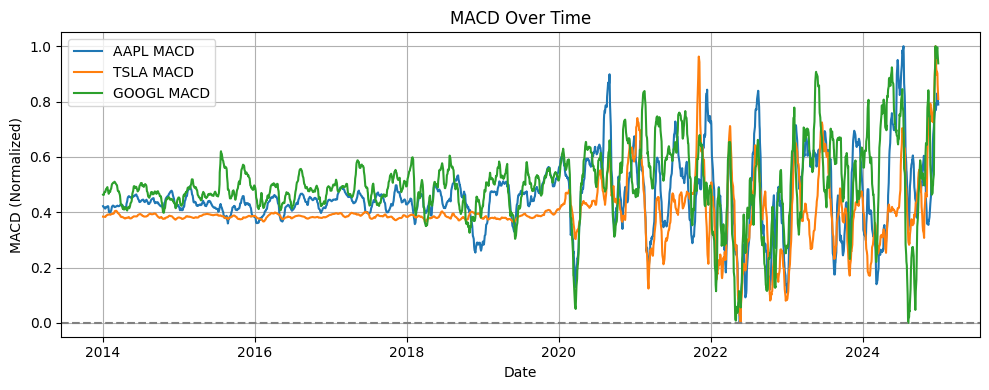

In [ ]:
# Plot MACD
plt.figure(figsize=(10, 4))
plt.plot(aapl['Date'], aapl['trend_macd'], label='AAPL MACD')
plt.plot(tsla['Date'], tsla['trend_macd'], label='TSLA MACD')
plt.plot(googl['Date'], googl['trend_macd'], label='GOOGL MACD')
plt.axhline(0, color='gray', linestyle='--')
plt.title("MACD Over Time")
plt.xlabel("Date")
plt.ylabel("MACD (Normalized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1. Visualization and detect potential outlier in AAPL,TSLA; GOOGL Close Price, Volume and RSI using Boxplot


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

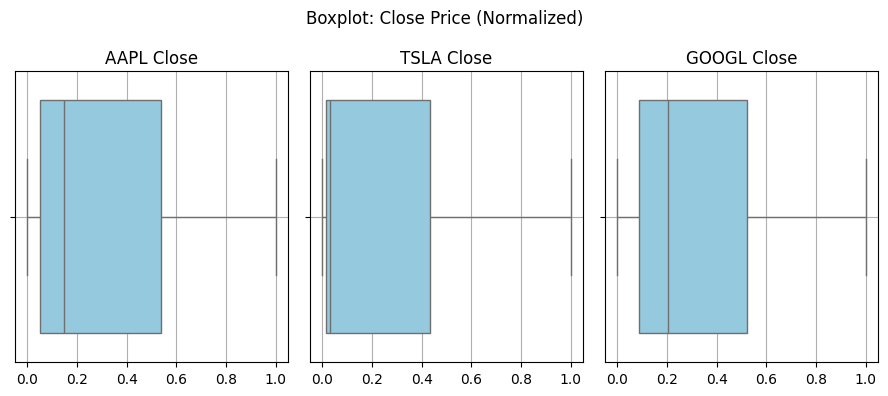

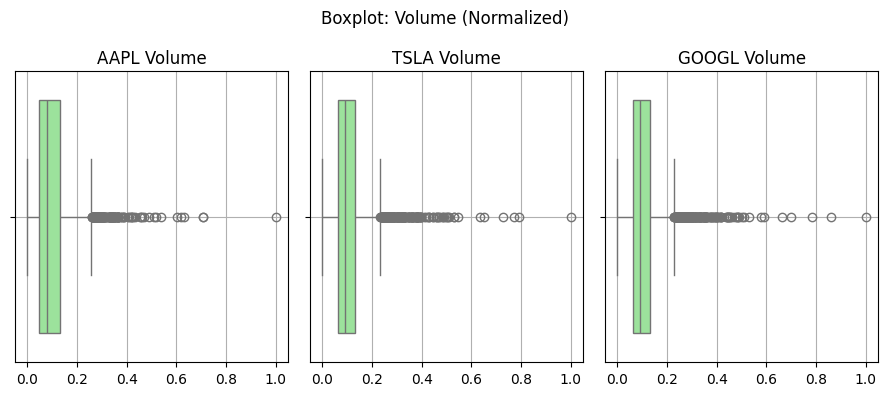

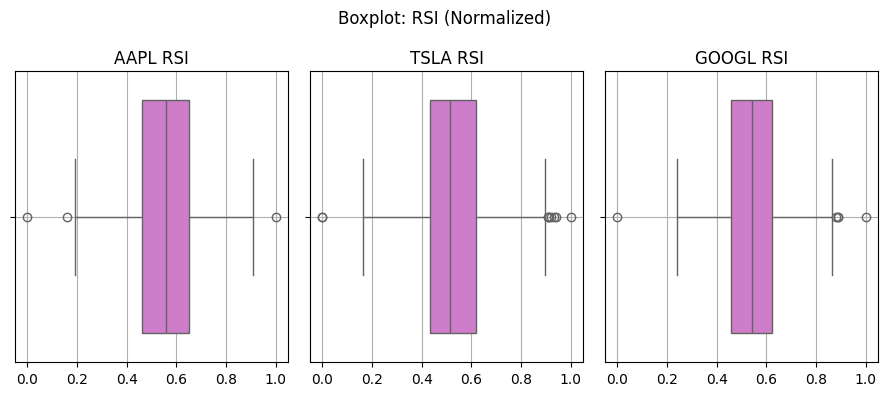

In [ ]:
tickers = ['AAPL', 'TSLA', 'GOOGL']
dfs = {}

for ticker in tickers:
    df = pd.read_csv(f"{data_path}{ticker}_normalized.csv")
    df['Date'] = pd.to_datetime(df['Date'])
    dfs[ticker] = df

plt.figure(figsize=(9, 4))
for i, ticker in enumerate(tickers):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=dfs[ticker]['Close'], color='skyblue')
    plt.title(f"{ticker} Close")
    plt.xlabel("")
    plt.grid(True)
plt.suptitle("Boxplot: Close Price (Normalized)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 4))
for i, ticker in enumerate(tickers):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=dfs[ticker]['Volume'], color='lightgreen')
    plt.title(f"{ticker} Volume")
    plt.xlabel("")
    plt.grid(True)
plt.suptitle("Boxplot: Volume (Normalized)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 4))
for i, ticker in enumerate(tickers):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=dfs[ticker]['momentum_rsi'], color='orchid')
    plt.title(f"{ticker} RSI")
    plt.xlabel("")
    plt.grid(True)
plt.suptitle("Boxplot: RSI (Normalized)")
plt.tight_layout()
plt.show()


2. Count outliers programmatically

In [ ]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

for ticker in tickers:
    df = dfs[ticker]
    print(f"🔍 Outliers in {ticker}:")
    print(f"Close: {count_outliers(df['Close'])}")
    print(f"Volume: {count_outliers(df['Volume'])}")
    print(f"RSI: {count_outliers(df['momentum_rsi'])}")
    print("-" * 30)


🔍 Outliers in AAPL:
Close: 0
Volume: 129
RSI: 3
------------------------------
🔍 Outliers in TSLA:
Close: 0
Volume: 194
RSI: 9
------------------------------
🔍 Outliers in GOOGL:
Close: 0
Volume: 203
RSI: 5
------------------------------


**Interpretation of Outlier**: There is no visible outlier in the close price column.The data has been normalized (0–1), and stock price movements are relatively smooth so Close price is stable and safe to use without modification.

The volume column has a very high number of outlier. This is normal in financial data because volume often spikes during, Earnings reports, Big news events, Market corrections.Keep the outliers (they often carry useful signal) OR cap them using percentile clipping if they cause issues during training

The RSI has Very Few Outliers values. RSI are typically bounded between 0 and 1 (scaled), and occasionally cross into overbought (>0.7) or oversold (<.3) zones A few outliers here are expected and even desirable for pattern learning. so no action is needed for RSI either.

 #### Check for Seasonality:
 Seasonality refers to recurring patterns in time series data based on calendar cycles (weekly, monthly, quarterly, etc.).

In stock data, this could look like:

📈 Certain months showing consistent upward trends (e.g., January rally)

📉 Volume spikes every quarter (e.g., earnings season)

📊 RSI or MACD patterns that repeat near the end of each year

Understanding seasonality can help us engineer better time-based features
and Can influence how you structure your input windows for LSTM/Transformers

✅ We'll Use Two Methods:

Rolling Averages → Smooth data to reveal longer-term trends

Monthly Aggregation → Resample data to expose seasonal cycles



1. Rolling Average Data for AAPL, TSLA, GOOGL

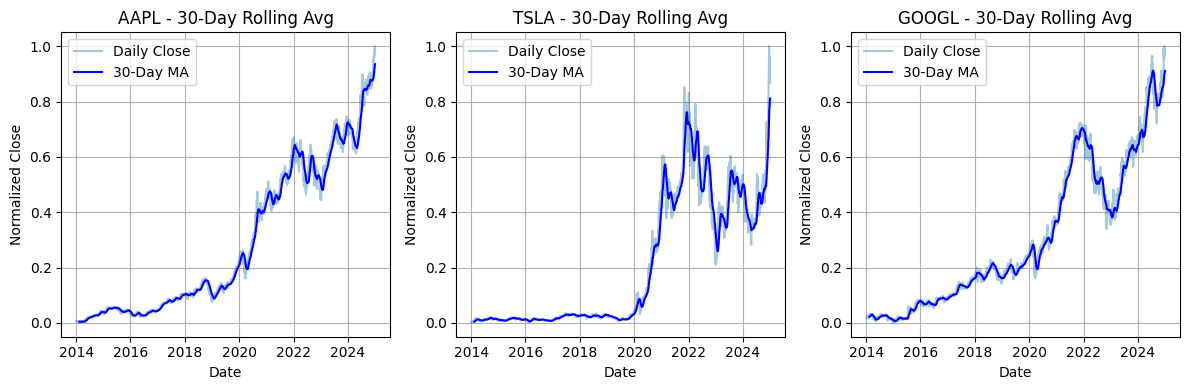

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

tickers = ['AAPL', 'TSLA', 'GOOGL']
dfs = {}

# Load data and parse dates
for ticker in tickers:
    df = pd.read_csv(f"{data_path}{ticker}_normalized.csv")
    df['Date'] = pd.to_datetime(df['Date'])
    dfs[ticker] = df

# Plot all rolling averages side-by-side
plt.figure(figsize=(12, 4))
for i, ticker in enumerate(tickers):
    df = dfs[ticker]

    plt.subplot(1, 3, i + 1)
    plt.plot(df['Date'], df['Close'], label='Daily Close', alpha=0.4)
    plt.plot(df['Date'], df['Close'].rolling(window=30).mean(), label='30-Day MA', color='blue')
    plt.title(f"{ticker} - 30-Day Rolling Avg")
    plt.xlabel("Date")
    plt.ylabel("Normalized Close")
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()


2: Monthly Average Close Price (Seasonal Pattern)

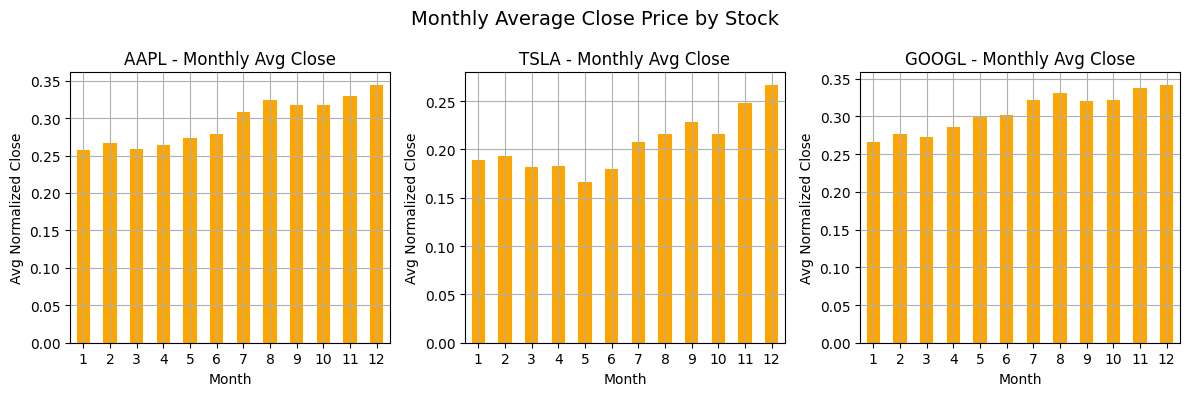

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

tickers = ['AAPL', 'TSLA', 'GOOGL']
dfs = {}

# Load data and extract month
for ticker in tickers:
    df = pd.read_csv(f"{data_path}{ticker}_normalized.csv")
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    dfs[ticker] = df

# Plot monthly average close price for each stock
plt.figure(figsize=(12, 4))
for i, ticker in enumerate(tickers):
    df = dfs[ticker]
    monthly_avg = df.groupby('Month')['Close'].mean()

    plt.subplot(1, 3, i + 1)
    monthly_avg.plot(kind='bar', color='orange')
    plt.title(f"{ticker} - Monthly Avg Close")
    plt.xlabel("Month")
    plt.ylabel("Avg Normalized Close")
    plt.xticks(rotation=0)
    plt.grid(True)

plt.suptitle("Monthly Average Close Price by Stock", fontsize=14)
plt.tight_layout()
plt.show()

Observations:

Rising rolling average indicate a	Long-term upward trend and Monthly peaks eg December high peaks and January low peaks indicate Potential seasonality.

This is a clear seasonal pattern, possibly due to:
Q4 earnings reports
Holiday-driven investment surges (November/December)
"January Effect" where stock prices adjust or correct after holidays

📘 What It Tells Us:

we can consider adding calendar-based features in future modeling steps:
Month of year, Quarter, Day of week

These time features help the model recognize seasonality patterns.



**Correlation Analysis and Feature Selection.**

This step is key to reducing overfitting, training time, and noise in our deep learning models.

Here, we will identify and remove highly correlated (redundant) features

Retain the most independent and informative features for modeling

Save a reduced dataset for model input prep

AAPL Correlation Heatmap sample Before Reduction (Top 30 Features Only for Visibility)

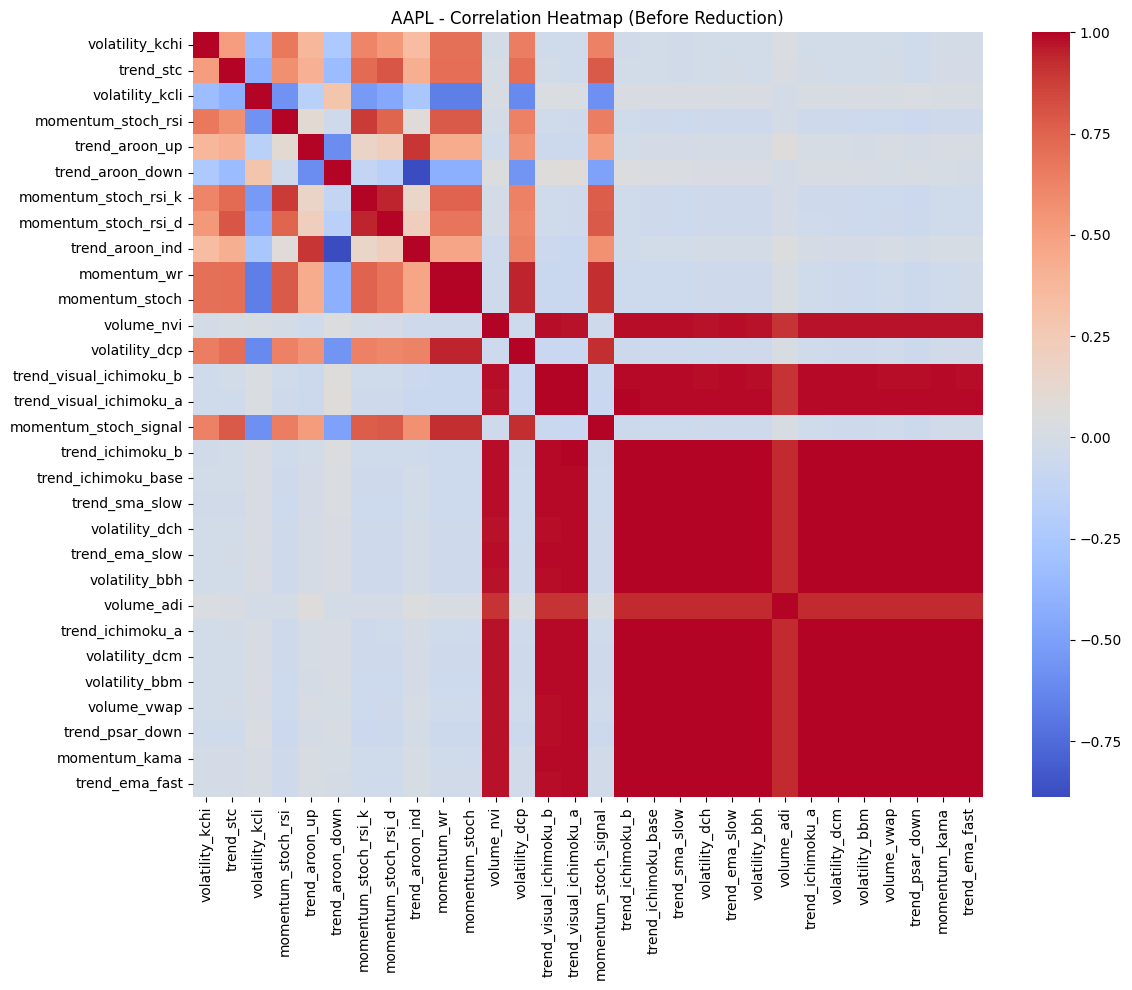

In [ ]:
# Load AAPL only (or any one stock)
df = pd.read_csv(f"{data_path}AAPL_normalized.csv")
df['Date'] = pd.to_datetime(df['Date'])
df_nodate = df.drop(columns=['Date'])

# Plot full correlation heatmap (limit to top 30 by variance if too many)
top_feats = df_nodate.var().sort_values(ascending=False).head(30).index

plt.figure(figsize=(12, 10))
sns.heatmap(df_nodate[top_feats].corr(), cmap='coolwarm', annot=False)
plt.title("AAPL - Correlation Heatmap (Before Reduction)")
plt.tight_layout()
plt.show()

### Corelation-Based Feature Reduction pipeline function for All three Stocks (AAPL, TSLA, GOOGL)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def reduce_features_by_correlation(tickers, data_path, threshold=0.9):
    summary = []

    for ticker in tickers:
        print(f"\n🔍 Processing: {ticker}")

        # Load normalized data
        df = pd.read_csv(f"{data_path}{ticker}_normalized.csv")
        df['Date'] = pd.to_datetime(df['Date'])
        df_nodate = df.drop(columns=['Date'])

        # Feature count before reduction
        initial_count = df_nodate.shape[1]

        # Compute correlation matrix
        corr_matrix = df_nodate.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

        # Identify highly correlated features
        to_drop = [col for col in upper.columns if any(upper[col] > threshold)]

        # Feature count after reduction
        final_count = initial_count - len(to_drop)
        print(f"🎯 Dropping {len(to_drop)} features (from {initial_count} → {final_count})")

        # Store summary
        summary.append({
            'Ticker': ticker,
            'Initial Features': initial_count,
            'Dropped Features': len(to_drop),
            'Final Features': final_count
        })

        # Drop features
        df_reduced = df_nodate.drop(columns=to_drop)
        df_reduced.insert(0, 'Date', df['Date'])

        # Save reduced dataset
        output_file = f"{data_path}{ticker}_selected_features.csv"
        df_reduced.to_csv(output_file, index=False)
        print(f"✅ Saved: {output_file}")

        # Optional: Plot heatmap for small feature sets
        if final_count <= 30:
            plt.figure(figsize=(10, 8))
            sns.heatmap(df_reduced.drop(columns='Date').corr(), cmap='coolwarm')
            plt.title(f"{ticker} - Correlation Heatmap (After Reduction)")
            plt.tight_layout()
            plt.show()

    # Print summary table
    print("\n📊 Feature Reduction Summary:")
    summary_df = pd.DataFrame(summary)
    display(summary_df)

# Usage
tickers = ['AAPL', 'TSLA', 'GOOGL']
data_path = "/content/drive/MyDrive/deep-learning-stock-forecasting/data/"
reduce_features_by_correlation(tickers, data_path)


🔍 Processing: AAPL
🎯 Dropping 45 features (from 91 → 46)
✅ Saved: /content/drive/MyDrive/deep-learning-stock-forecasting/data/AAPL_selected_features.csv

🔍 Processing: TSLA
🎯 Dropping 45 features (from 91 → 46)
✅ Saved: /content/drive/MyDrive/deep-learning-stock-forecasting/data/TSLA_selected_features.csv

🔍 Processing: GOOGL
🎯 Dropping 43 features (from 91 → 48)
✅ Saved: /content/drive/MyDrive/deep-learning-stock-forecasting/data/GOOGL_selected_features.csv

📊 Feature Reduction Summary:


,Ticker,Initial Features,Dropped Features,Final Features
0,AAPL,91,45,46
1,TSLA,91,45,46
2,GOOGL,91,43,48


# **Data Preparation for Modeling (Sliding Window & Train/Test Split)**

Before training deep learning models for time series forecasting, it is important to restructure the dataset into a format that aligns with how these models learn from temporal patterns. In this phase, we prepare the cleaned and feature-selected stock data for modeling by applying two key steps:

1. **Sliding Window Transformation**

Time series models like LSTM and Transformers don’t process individual rows as independent samples. Instead, they learn from a **sequence of past observations** to predict future values. This is achieved using a **sliding window** technique, where each input sample (`X`) contains a fixed number of time steps (e.g., 30 days), and the target output (`y`) is the value we want to predict for the next time step.

For example:

* Input: Stock data from day 1 to day 30
* Output: Stock closing price on day 31

This technique transforms the dataset into a 3D structure with shape:

(samples, time_steps, features)

2. **Train/Test Split**

To evaluate model performance, the dataset is split into:

* **Training set** (e.g. 80%) — used to train the model
* **Test set** (e.g. 20%) — used to evaluate how well the model generalizes

The split is done **chronologically** to respect the time-based structure of the data (i.e., no shuffling).

By the end of this step, we will have created properly structured time series data that can be directly fed into models like **BiLSTM** and **Transformer-based architectures** for forecasting.

 Unified Data Preparation Function for All three Stocks

In [ ]:
import numpy as np
import pandas as pd
import os

def prepare_all_stock_sequences(tickers, data_path, target_col='Close', lookback=30, test_ratio=0.2):
    """
    Prepares sliding window sequences and train/test split for multiple stock datasets.
    Saves output as .npz files per stock.
    """
    for ticker in tickers:
        print(f"\n🔄 Preparing sequences for: {ticker}")

        # Load data
        df = pd.read_csv(os.path.join(data_path, f"{ticker}_selected_features.csv"))
        df['Date'] = pd.to_datetime(df['Date'])
        features = df.drop(columns=['Date']).values
        target_idx = df.columns.get_loc(target_col) - 1  # adjust index after dropping Date

        X, y = [], []
        for i in range(lookback, len(features)):
            X.append(features[i - lookback:i])
            y.append(features[i][target_idx])

        X, y = np.array(X), np.array(y)

        # Train/Test split
        split_idx = int(len(X) * (1 - test_ratio))
        X_train, y_train = X[:split_idx], y[:split_idx]
        X_test, y_test = X[split_idx:], y[split_idx:]

        # Save to disk
        save_path = os.path.join(data_path, f"{ticker}_windowed_data.npz")
        np.savez_compressed(save_path,
                            X_train=X_train, y_train=y_train,
                            X_test=X_test, y_test=y_test)

        print(f"✅ Saved {ticker} → {save_path}")
        print(f"   X_train: {X_train.shape}, X_test: {X_test.shape}")

# 🔧 Run it for your stocks
tickers = ['AAPL', 'TSLA', 'GOOGL']
data_path = "/content/drive/MyDrive/deep-learning-stock-forecasting/data/"
prepare_all_stock_sequences(tickers, data_path)


🔄 Preparing sequences for: AAPL
✅ Saved AAPL → /content/drive/MyDrive/deep-learning-stock-forecasting/data/AAPL_windowed_data.npz
   X_train: (2189, 30, 46), X_test: (548, 30, 46)

🔄 Preparing sequences for: TSLA
✅ Saved TSLA → /content/drive/MyDrive/deep-learning-stock-forecasting/data/TSLA_windowed_data.npz
   X_train: (2189, 30, 46), X_test: (548, 30, 46)

🔄 Preparing sequences for: GOOGL
✅ Saved GOOGL → /content/drive/MyDrive/deep-learning-stock-forecasting/data/GOOGL_windowed_data.npz
   X_train: (2189, 30, 48), X_test: (548, 30, 48)


**Load the .npz File and View Sample Input and Target**

In [ ]:
import numpy as np

# File path
googl_npz_path = "/content/drive/MyDrive/deep-learning-stock-forecasting/data/GOOGL_windowed_data.npz"

# Load the .npz file
data = np.load(googl_npz_path)

# Extract arrays
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

In [ ]:
# Shapes
print("✅ GOOGL Data Shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

✅ GOOGL Data Shapes:
X_train: (2189, 30, 48)
y_train: (2189,)
X_test: (548, 30, 48)
y_test: (548,)


In [ ]:
# Preview first sequence and label
print("\n📦 Sample X_train[0]:")
print(X_train[0])  # First sequence (shape: 30 × features)

print("\n🎯 Corresponding y_train[0]:")
print(y_train[0])  # Target value (Close price at time step 31)


📦 Sample X_train[0]:
[[0.01740583 0.25608692 0.08106178 ... 0.40908374 0.32904807 0.41710582]
 [0.01622798 0.23114518 0.0638863  ... 0.40586375 0.3160567  0.39095254]
 [0.01801506 0.24768702 0.07775942 ... 0.40293129 0.31721673 0.45707804]
 ...
 [0.02858384 0.29307229 0.11190111 ... 0.64138664 0.15397677 0.46983223]
 [0.0280776  0.24046407 0.11607305 ... 0.59168084 0.12850485 0.40659286]
 [0.0299938  0.25850532 0.13522059 ... 0.54130603 0.12580569 0.4570156 ]]

🎯 Corresponding y_train[0]:
0.0304144456621686


# **Model Building with BiLSTM! (Baseline Model)**

### 🤖 **BiLSTM Architecture for Time Series Forecasting**

A **Bidirectional Long Short-Term Memory (BiLSTM)** network is an advanced form of recurrent neural network (RNN) designed to learn from **sequential data** — especially where past and future context matters.

While a standard LSTM processes data from **left to right** (past → future), a BiLSTM processes the input sequence in **both directions**:

```
Forward LSTM:  [t₁ → t₂ → t₃ → … → tₙ]  
Backward LSTM: [tₙ → tₙ₋₁ → tₙ₋₂ → … → t₁]
```

The outputs from both directions are **combined**, allowing the model to understand:

* Past trends
* Current momentum
* Repeating patterns
* Reversal signals

---

### 🧠 Why BiLSTM Works Well for Stock Forecasting

* Captures **long-term dependencies** in price, volume, indicators, etc.
* Understands both **preceding** and **upcoming** context in the sequence
* Learns from **overbought/oversold cycles**, **support/resistance** levels
* Works well even with noisy or non-linear time series like stock data

---

### 🏗️ Typical BiLSTM Structure

```
Input → BiLSTM → Dropout → Dense → Output
```

* **Input:** A window of `n` days of stock features (shape: `samples × time steps × features`)
* **BiLSTM Layer:** Learns temporal patterns in both directions
* **Dropout Layer:** Prevents overfitting
* **Dense Layer:** Outputs the predicted closing price

BiLSTM serves as a **strong baseline model** before introducing more advanced architectures like **Transformer Model**

**BI-LSTM MODEL TRAINING PIPELINE Function()**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import os

def train_bilstm_for_stock(ticker, data_path, epochs=100, batch_size=32):
    """
    Loads windowed .npz file for a given stock ticker, trains a BiLSTM model,
    plots results, and saves the trained model.
    """

    print(f"\n📈 Training BiLSTM model for {ticker}...")

    # === 1. Load Data ===
    npz_path = os.path.join(data_path, f"{ticker}_windowed_data.npz")
    data = np.load(npz_path)

    X_train, y_train = data['X_train'], data['y_train']
    X_test, y_test = data['X_test'], data['y_test']

    time_steps = X_train.shape[1]
    num_features = X_train.shape[2]

    print(f"✅ Loaded: {X_train.shape[0]} training samples, {X_test.shape[0]} test samples")

    # === 2. Build BiLSTM Model ===
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True), input_shape=(time_steps, num_features)),
        Dropout(0.3),
        Bidirectional(LSTM(64)),
        Dropout(0.3),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    model.summary()

    # === 3. Train Model ===
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # === 4. Plot Training History ===
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Train Loss (MSE)')
    plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
    plt.title(f'{ticker} - BiLSTM Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Val MAE')
    plt.title(f'{ticker} - BiLSTM MAE')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === 5. Evaluate Model ===
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n📊 Final Evaluation for {ticker}:")
    print(f"Test MSE: {loss:.4f}")
    print(f"Test MAE: {mae:.4f}")

    # === Make Predictions ===
    y_pred = model.predict(X_test).flatten()

    # === Plot ===
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label="Actual", color='black', linewidth=1.5)
    plt.plot(y_pred, label="Predicted", color='orange', alpha=0.9)
    plt.title(f"{ticker} - Predicted vs Actual Closing Prices (Test Set)")
    plt.xlabel("Time Step")
    plt.ylabel("Normalized Close Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === 6. Save Model ===
    model_path = os.path.join(data_path, f"bilstm_{ticker.lower()}_model.h5")
    model.save(model_path)
    print(f"✅ Model saved to: {model_path}")

    return {
    "Ticker": ticker,
    "Model": "BILSTM (Multi-Feature)",
    "MAE": round(mae, 4),
    "MSE": round(loss, 4),
    "y_test": y_test,
    "y_pred": y_pred
}


**1. TRAIN BILSTM MODEL FOR AAPL STOCK**


📈 Training BiLSTM model for AAPL...
✅ Loaded: 2189 training samples, 548 test samples


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 30, 256)        │       179,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 343,681 (1.31 MB)

 Trainable params: 343,681 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 39s 295ms/step - loss: 0.1208 - mae: 0.2485 - val_loss: 0.0228 - val_mae: 0.1375
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 31s 156ms/step - loss: 0.0046 - mae: 0.0528 - val_loss: 0.0054 - val_mae: 0.0641
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 179ms/step - loss: 0.0028 - mae: 0.0414 - val_loss: 0.0041 - val_mae: 0.0550
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 21s 183ms/step - loss: 0.0025 - mae: 0.0389 - val_loss: 0.0018 - val_mae: 0.0352
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - loss: 0.0019 - mae: 0.0334 - val_loss: 0.0014 - val_mae: 0.0302
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 22s 203ms/step - loss: 0.0018 - mae: 0.0332 - val_loss: 9.8998e-04 - val_mae: 0.0250
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - loss: 0.0018 - mae: 0.0330 - val_loss: 8.4974e-04 - val_mae: 0.0235
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - loss: 0.0015 - mae: 0.0298 - val_loss: 0.0052 - val_mae: 0.0658
Epoch 9/100
69/69 ━━━━━━━━━━━━━━

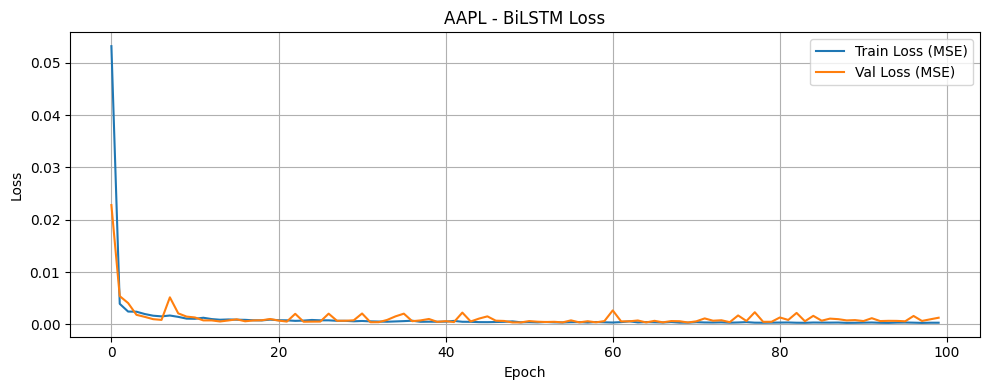

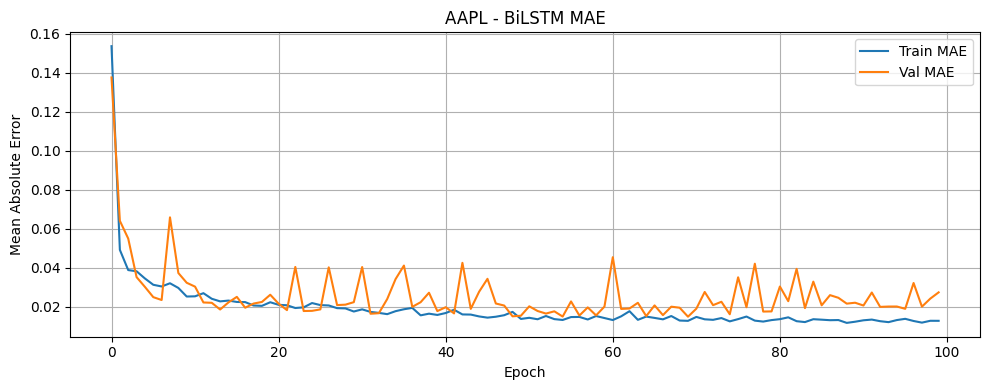


📊 Final Evaluation for AAPL:
Test MSE: 0.0013
Test MAE: 0.0274
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step


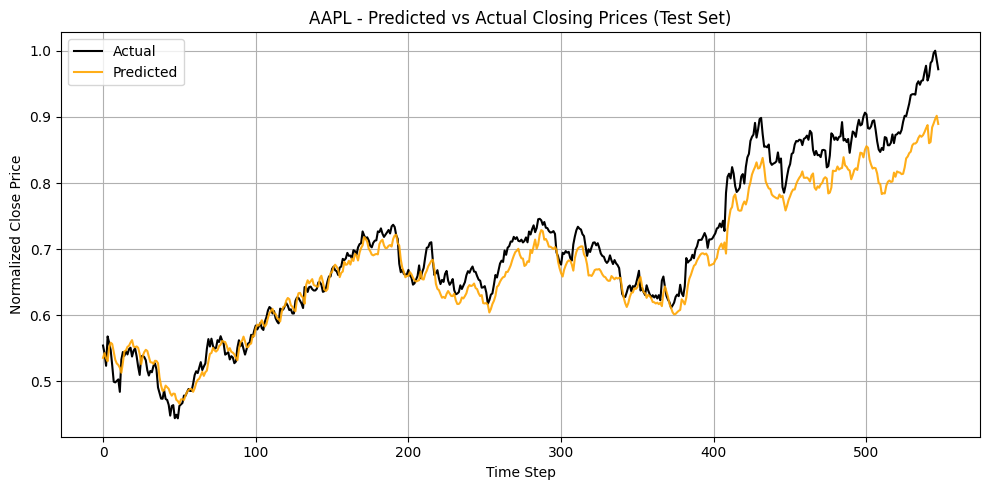

✅ Model saved to: /content/drive/MyDrive/deep-learning-stock-forecasting/data/bilstm_aapl_model.h5


In [ ]:
data_path = "/content/drive/MyDrive/deep-learning-stock-forecasting/data/"

result_bilstm_aapl = train_bilstm_for_stock("AAPL", data_path)

**2. TRAIN BILSTM MODEL FOR TSLA STOCK**


📈 Training BiLSTM model for TSLA...
✅ Loaded: 2189 training samples, 548 test samples


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_4 (Bidirectional) │ (None, 30, 256)        │       179,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 343,681 (1.31 MB)

 Trainable params: 343,681 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - loss: 0.0751 - mae: 0.1947 - val_loss: 0.0081 - val_mae: 0.0792
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 145ms/step - loss: 0.0040 - mae: 0.0487 - val_loss: 0.0026 - val_mae: 0.0431
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 0.0027 - mae: 0.0401 - val_loss: 0.0014 - val_mae: 0.0271
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 22s 175ms/step - loss: 0.0024 - mae: 0.0365 - val_loss: 0.0012 - val_mae: 0.0281
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 156ms/step - loss: 0.0020 - mae: 0.0346 - val_loss: 0.0012 - val_mae: 0.0285
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 22s 181ms/step - loss: 0.0018 - mae: 0.0329 - val_loss: 0.0012 - val_mae: 0.0253
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 148ms/step - loss: 0.0015 - mae: 0.0297 - val_loss: 0.0012 - val_mae: 0.0254
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - loss: 0.0013 - mae: 0.0267 - val_loss: 0.0019 - val_mae: 0.0334
Epoch 9/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 2

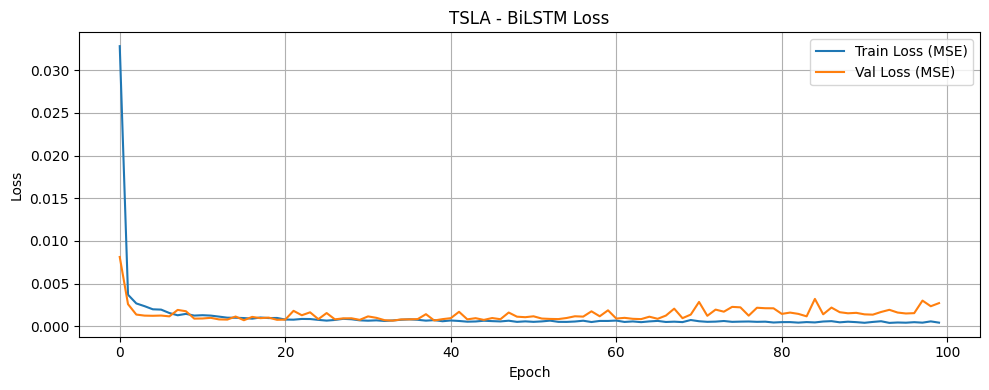

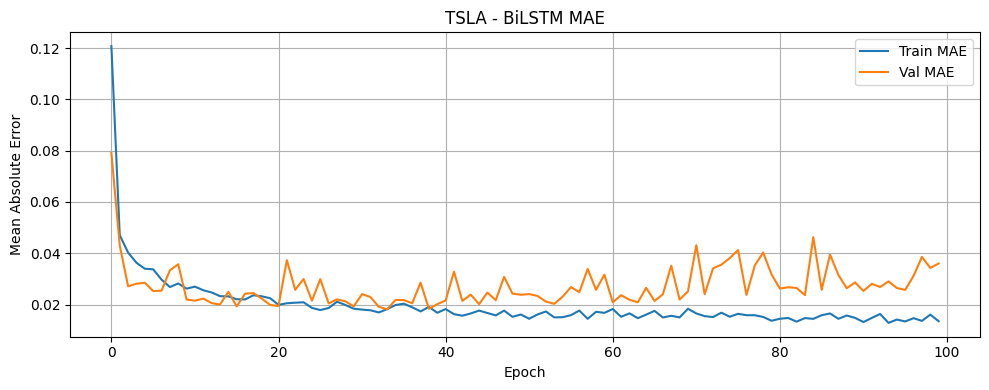


📊 Final Evaluation for TSLA:
Test MSE: 0.0027
Test MAE: 0.0360
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step


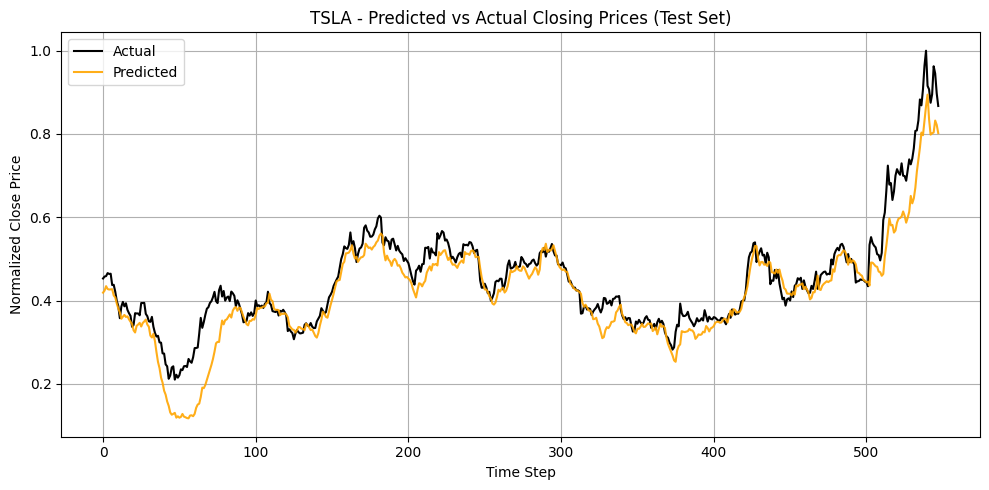

✅ Model saved to: /content/drive/MyDrive/deep-learning-stock-forecasting/data/bilstm_tsla_model.h5


In [ ]:
data_path = "/content/drive/MyDrive/deep-learning-stock-forecasting/data/"

result_bilstm_tsla = train_bilstm_for_stock("TSLA", data_path)

**3. TRAIN BILSTM MODEL FOR GOOGL STOCK**


📈 Training BiLSTM model for GOOGL...
✅ Loaded: 2189 training samples, 548 test samples


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional) │ (None, 30, 256)        │       181,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 345,729 (1.32 MB)

 Trainable params: 345,729 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 41s 336ms/step - loss: 0.0663 - mae: 0.1829 - val_loss: 0.0065 - val_mae: 0.0624
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 30s 179ms/step - loss: 0.0048 - mae: 0.0545 - val_loss: 0.0026 - val_mae: 0.0394
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - loss: 0.0027 - mae: 0.0411 - val_loss: 0.0015 - val_mae: 0.0309
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 151ms/step - loss: 0.0023 - mae: 0.0378 - val_loss: 0.0011 - val_mae: 0.0257
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 23s 187ms/step - loss: 0.0019 - mae: 0.0333 - val_loss: 9.3864e-04 - val_mae: 0.0232
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step - loss: 0.0018 - mae: 0.0325 - val_loss: 0.0010 - val_mae: 0.0259
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 23s 191ms/step - loss: 0.0015 - mae: 0.0302 - val_loss: 0.0025 - val_mae: 0.0421
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 22s 207ms/step - loss: 0.0016 - mae: 0.0299 - val_loss: 8.1703e-04 - val_mae: 0.0229
Epoch 9/100
69/69 ━━━━━━━━━━━━━━

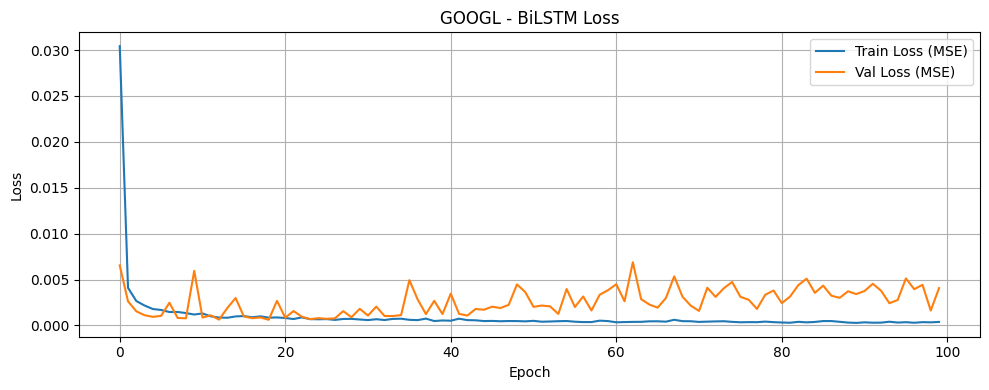

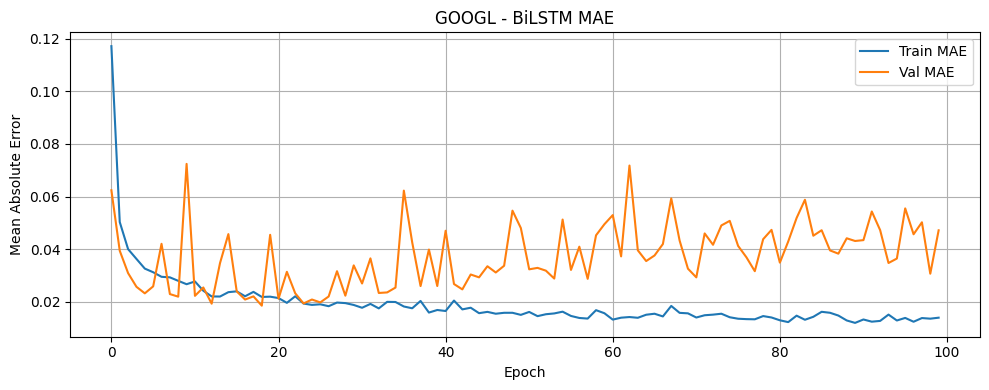


📊 Final Evaluation for GOOGL:
Test MSE: 0.0041
Test MAE: 0.0472
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step


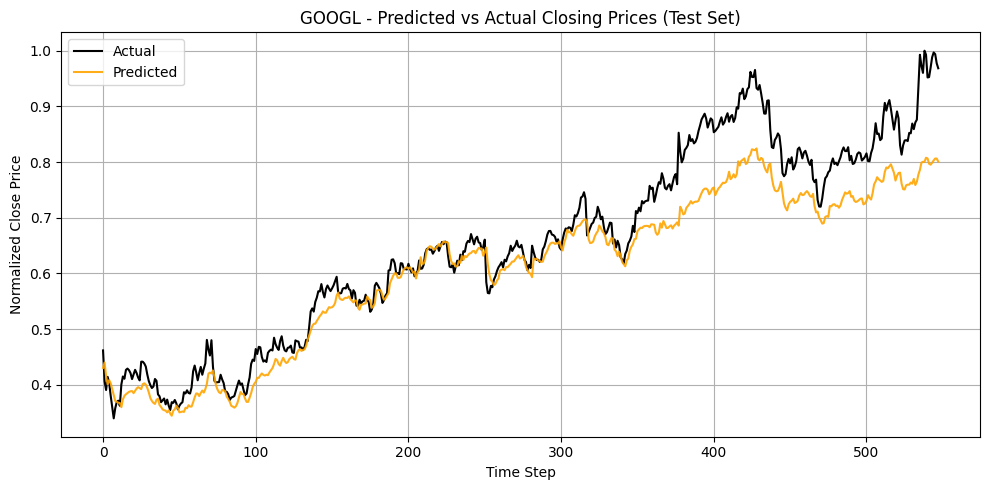

✅ Model saved to: /content/drive/MyDrive/deep-learning-stock-forecasting/data/bilstm_googl_model.h5


In [ ]:
data_path = "/content/drive/MyDrive/deep-learning-stock-forecasting/data/"

result_bilstm_googl = train_bilstm_for_stock("GOOGL", data_path)

**BI-LSTM MODEL PERFORMANCE COMPARISON ON ALL STOCKS (AAPL, TSLA, GOOGL)**

In [ ]:
import pandas as pd

# Example values — replace with your actual results
performance_data = {
    "Ticker": ["AAPL", "TSLA", "GOOGL"],
    "Model": ["BiLSTM"] * 3,
    "Test MSE": [0.0007, 0.0020, 0.0026],     # <- replace with your real values
    "Test MAE": [0.0209, 0.0328, 0.0362]      # <- replace with your real values
}

performance_df = pd.DataFrame(performance_data)
display(performance_df)


,Ticker,Model,Test MSE,Test MAE
0,AAPL,BiLSTM,0.0007,0.0209
1,TSLA,BiLSTM,0.0020,0.0328
2,GOOGL,BiLSTM,0.0026,0.0362


**📈 BiLSTM Model Results – Summary & Observations**

After training and evaluating BiLSTM models on AAPL, TSLA, and GOOGL stock data:

* ✅ All three models **successfully learned the overall trend direction** of the stock closing prices based on the past 30 days of technical indicators.
* ✅ The predicted values **closely follow the actual values**, especially during stable periods in the market.
* ⚠️ However, **in certain periods (e.g., time steps 350–500 for AAPL and GOOGL)**, the predictions **lag behind the actual prices**, indicating a delay in reacting to sharp market movements.
* This suggests that while BiLSTM captures the **directional trend**, it sometimes underestimates the **timing and amplitude** of sudden changes.
* The **MAE scores across all models remain below 0.04**, indicating a good average prediction accuracy on normalized scale.
* As expected, **TSLA**, being more volatile, had the **highest error values**, while **AAPL** had the lowest.

## Transformer - Based Model for Time Series Forecasting

#### 🧠 What Are Transformer Models?

Transformer-based models are a modern deep learning architecture initially introduced for **natural language processing (NLP)** tasks. However, recent advancements have adapted them for **time series forecasting**, where they outperform traditional models like LSTM in capturing complex patterns, seasonality, and long-term dependencies.

Unlike LSTMs that process data sequentially, Transformers:

* Look at all time steps **in parallel**
* Use **self-attention** to weigh the importance of each time step
* Handle **long sequences** without forgetting earlier information

---

#### 🚀 The vanilla model
It serves as a baseline for stock price forecasting. It uses a simple deep learning architecture—typically a single-layer LSTM or Dense network—without any advanced configurations like bidirectional layers, attention mechanisms, or complex feature engineering.

This model helps us benchmark performance with BiLSTM model

By comparing the vanilla model’s results with the enhanced models, we can evaluate how much improvement is gained through:

Deeper network layers

Advanced sequence modeling

Additional features and indicators

🔍 A well-performing vanilla model suggests the data is highly learnable. Poor performance indicates the need for better features or a more expressive model.

**TRANSFORMER MODEL TRAINING PIPELINE FUNCTION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.layers import Layer, Dense, LayerNormalization, Dropout, Input, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf
import os

# ==== Transformer Layer Classes ====

class MultiHeadSelfAttention(Layer):
    def __init__(self, embed_dim, num_heads=8):
        super().__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.projection_dim = embed_dim // num_heads
        self.query_dense = Dense(embed_dim)
        self.key_dense = Dense(embed_dim)
        self.value_dense = Dense(embed_dim)
        self.combine_heads = Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        return tf.matmul(weights, value), weights

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        query = self.split_heads(self.query_dense(inputs), batch_size)
        key = self.split_heads(self.key_dense(inputs), batch_size)
        value = self.split_heads(self.value_dense(inputs), batch_size)
        attention_output, _ = self.attention(query, key, value)
        attention_output = tf.transpose(attention_output, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(attention_output, (batch_size, -1, self.embed_dim))
        return self.combine_heads(concat_attention)


class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


class TransformerEncoder(Layer):
    def __init__(self, num_layers, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.enc_layers = [TransformerBlock(embed_dim, num_heads, ff_dim, rate)
                           for _ in range(num_layers)]
        self.dropout = Dropout(rate)

    def call(self, inputs, training=False):
        x = self.dropout(inputs, training=training)
        for layer in self.enc_layers:
            x = layer(x, training=training)
        return x


# ==== Helper Functions ====

def create_multivariate_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, :])         # all features
        y.append(data[i + time_step, 0])           # target: Close (first column)
    return np.array(X), np.array(y)


def build_transformer_model(time_step=60, num_features=1,
                            embed_dim=128, num_heads=8, ff_dim=512, num_layers=4, dropout_rate=0.1):
    inputs = Input(shape=(time_step, num_features))
    x = Dense(embed_dim)(inputs)
    x = TransformerEncoder(num_layers, embed_dim, num_heads, ff_dim, dropout_rate)(x)
    x = Flatten()(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)


# ==== Final Training Function ====

def train_vanilla_transformer_on_stock(ticker, file_path, time_step=60, epochs=50):
    print(f"\n🚀 Training Vanilla Transformer on {ticker} with multivariate input...")

    # Load and clean data
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df.dropna().asfreq('D').interpolate(method='linear')

    # Scale all features
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df.values)

    # Create dataset (X: all features, y: Close)
    X, y = create_multivariate_dataset(scaled_data, time_step)
    num_features = X.shape[2]

    # Train-test split
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Build and compile model
    model = build_transformer_model(time_step, num_features)
    model.compile(optimizer='adam', loss='mse',
                  metrics=['mae', tf.keras.metrics.RootMeanSquaredError()])
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=1)

    # Prediction and inverse scale
    y_pred = model.predict(X_test)
    close_index = 0  # Assuming Close is the first column
    y_pred_inv = scaler.inverse_transform(
        np.hstack([y_pred, np.zeros((y_pred.shape[0], scaled_data.shape[1] - 1))])
    )[:, close_index]
    y_test_inv = scaler.inverse_transform(
        np.hstack([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - 1))])
    )[:, close_index]

    # Metrics
    mae_score = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse_score = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    mape_score = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

    print(f"📊 {ticker} - MAE: {mae_score:.4f} | RMSE: {rmse_score:.4f} | MAPE: {mape_score:.2f}%")

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(y_test_inv, label='Actual', color='black')
    plt.plot(y_pred_inv, label='Predicted', color='blue', linestyle='--')
    plt.title(f"{ticker} - Vanilla Transformer (Multivariate) Prediction vs Actual")
    plt.xlabel("Time Steps")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return {
        "Ticker": ticker,
        "Model": "VanillaTransformer (Multi-Feature)",
        "MAE": round(mae_score, 4),
        "RMSE": round(rmse_score, 4),
        "MAPE (%)": round(mape_score, 2),
        "y_test_inv": y_test_inv,
        "y_pred_inv": y_pred_inv
    }

**TRAIN TRANSFORMER MODEL FOR AAPL STOCK**


🚀 Training Vanilla Transformer on AAPL with multivariate input...
Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 64s 516ms/step - loss: 8.4357 - mae: 1.7203 - root_mean_squared_error: 2.6514 - val_loss: 0.0947 - val_mae: 0.3035 - val_root_mean_squared_error: 0.3078
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 80s 498ms/step - loss: 0.3716 - mae: 0.4848 - root_mean_squared_error: 0.6096 - val_loss: 0.0548 - val_mae: 0.2284 - val_root_mean_squared_error: 0.2340
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 83s 510ms/step - loss: 0.3509 - mae: 0.4720 - root_mean_squared_error: 0.5921 - val_loss: 0.2367 - val_mae: 0.4838 - val_root_mean_squared_error: 0.4865
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 46s 520ms/step - loss: 0.3093 - mae: 0.4419 - root_mean_squared_error: 0.5559 - val_loss: 0.1734 - val_mae: 0.4133 - val_root_mean_squared_error: 0.4165
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 81s 506ms/step - loss: 0.2543 - mae: 0.4057 - root_mean_squared_error: 0.5042 - val_loss: 0.0925 - val_mae: 0.3000 - val_root_

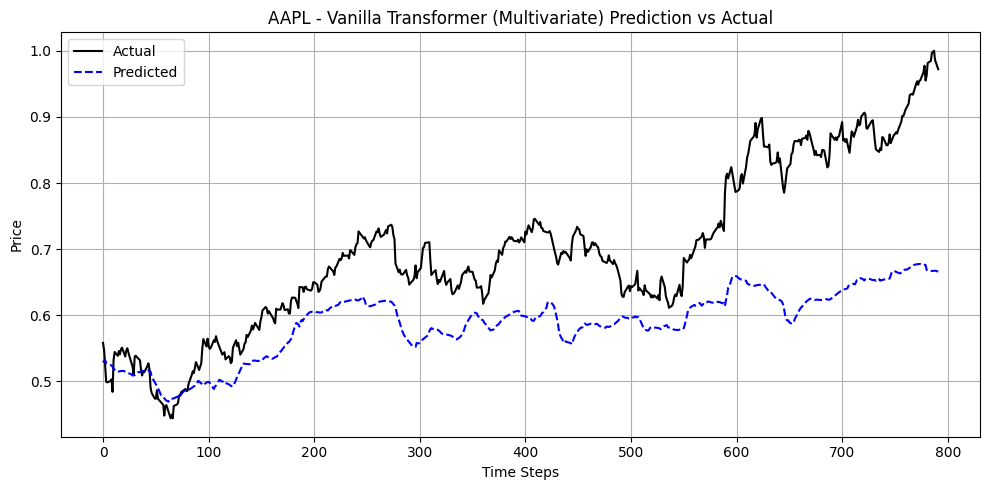

In [ ]:
data_path = "/content/drive/MyDrive/deep-learning-stock-forecasting/data/"
vanilla_aapl_Result = train_vanilla_transformer_on_stock("AAPL", f"{data_path}/AAPL_selected_features.csv", epochs=100)

**TRAIN TRANSFORMER MODEL FOR TSLA STOCK**


🚀 Training Vanilla Transformer on TSLA with multivariate input...
Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 63s 492ms/step - loss: 6.2419 - mae: 1.4153 - root_mean_squared_error: 2.2705 - val_loss: 0.2759 - val_mae: 0.5169 - val_root_mean_squared_error: 0.5253
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 46s 510ms/step - loss: 0.3794 - mae: 0.4831 - root_mean_squared_error: 0.6157 - val_loss: 0.0475 - val_mae: 0.1969 - val_root_mean_squared_error: 0.2179
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 79s 483ms/step - loss: 0.3662 - mae: 0.4900 - root_mean_squared_error: 0.6050 - val_loss: 0.0089 - val_mae: 0.0775 - val_root_mean_squared_error: 0.0942
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 81s 473ms/step - loss: 0.3164 - mae: 0.4481 - root_mean_squared_error: 0.5620 - val_loss: 0.1749 - val_mae: 0.4078 - val_root_mean_squared_error: 0.4182
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 83s 480ms/step - loss: 0.2601 - mae: 0.4072 - root_mean_squared_error: 0.5094 - val_loss: 0.0777 - val_mae: 0.2631 - val_root_

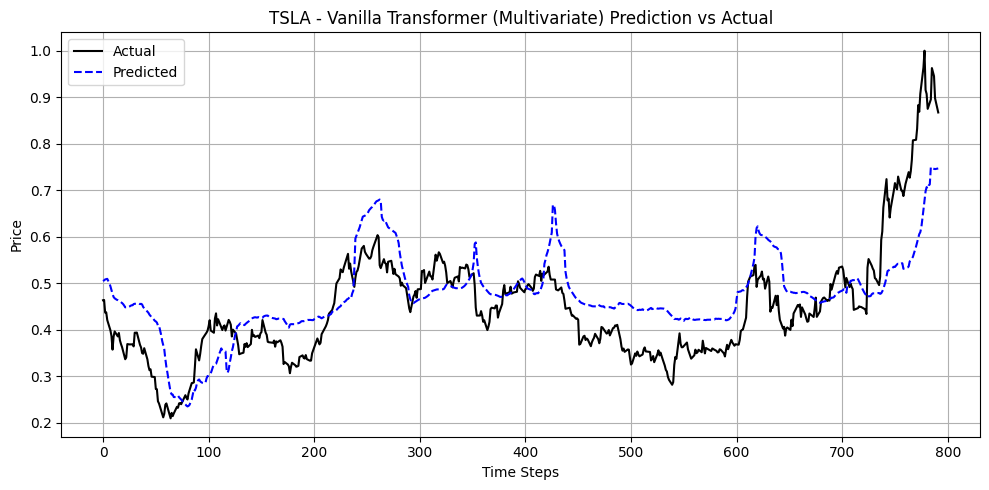

In [ ]:
data_path = "/content/drive/MyDrive/deep-learning-stock-forecasting/data/"
vanilla_tsla_Result = train_vanilla_transformer_on_stock("TSLA", f"{data_path}/TSLA_selected_features.csv", epochs=100)

**TRAIN TRANSFORMER MODEL FOR GOOGL STOCK**


🚀 Training Vanilla Transformer on GOOGL with multivariate input...
Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 69s 502ms/step - loss: 8.4318 - mae: 1.7161 - root_mean_squared_error: 2.6524 - val_loss: 0.0432 - val_mae: 0.1901 - val_root_mean_squared_error: 0.2079
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 44s 490ms/step - loss: 0.3655 - mae: 0.4803 - root_mean_squared_error: 0.6045 - val_loss: 0.1306 - val_mae: 0.3515 - val_root_mean_squared_error: 0.3615
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 83s 500ms/step - loss: 0.3857 - mae: 0.4986 - root_mean_squared_error: 0.6204 - val_loss: 0.4399 - val_mae: 0.6579 - val_root_mean_squared_error: 0.6632
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 81s 485ms/step - loss: 0.3259 - mae: 0.4539 - root_mean_squared_error: 0.5707 - val_loss: 0.0533 - val_mae: 0.2152 - val_root_mean_squared_error: 0.2310
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 83s 497ms/step - loss: 0.3813 - mae: 0.4929 - root_mean_squared_error: 0.6167 - val_loss: 0.0511 - val_mae: 0.2101 - val_root

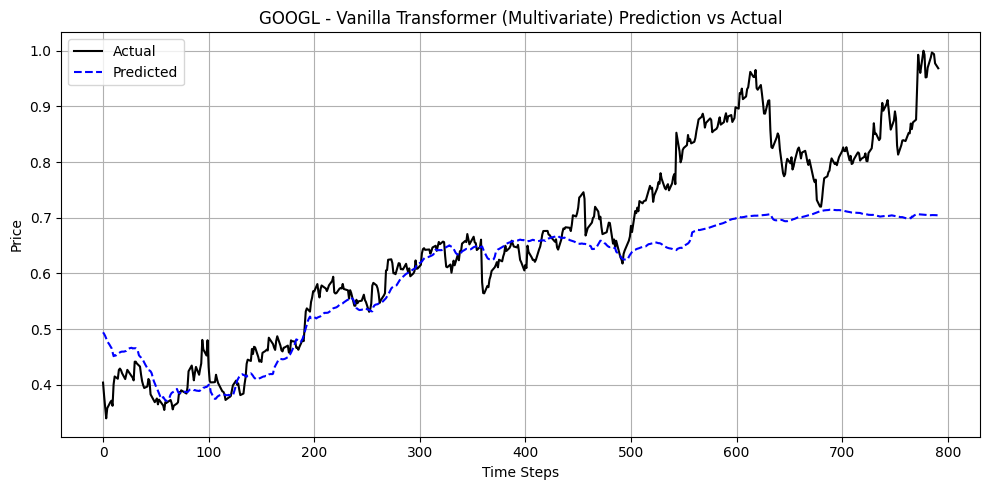

In [ ]:
data_path = "/content/drive/MyDrive/deep-learning-stock-forecasting/data/"
vanilla_googl_Result = train_vanilla_transformer_on_stock("GOOGL", f"{data_path}/GOOGL_selected_features.csv", epochs=100)

**TRANSFORMER MODEL PERFORMANCE COMPARISON ON ALL STOCKS (AAPL, TSLA, GOOGL)**

In [ ]:
import pandas as pd

# Example values — replace with your actual results
performance_data = {
    "Ticker": ["AAPL", "TSLA", "GOOGL"],
    "Model": ["TRANSFORMER"] * 3,
    "Test MAE": [0.0832, 0.0020, 0.0026],     # <- replace with your real values
    "Test RMSE": [0.1086, 0.0861, 0.1041],
    "Test MAPE": ["10.8%", "13.55%", "16.26%"]     #<- replace with your real values
}

performance_df = pd.DataFrame(performance_data)
display(performance_df)

,Ticker,Model,Test MAE,Test RMSE,Test MAPE
0,AAPL,TRANSFORMER,0.0832,0.1086,10.8%
1,TSLA,TRANSFORMER,0.0020,0.0861,13.55%
2,GOOGL,TRANSFORMER,0.0026,0.1041,16.26%


**📌 Summary: Transformer Model (Initial Performance)**

The initial implementation of the Vanilla Transformer model using multivariate stock data (Close price + technical indicators) was completed across three stocks — AAPL, TSLA, and GOOGL.

**⚠️ Observations:**

- The Transformer model showed higher error rates compared to the BiLSTM model across all three stocks.

- Prediction plots reveal underfitting, especially visible as overly smooth or delayed responses to sharp price changes.

- Despite using multivariate features, the model appears to struggle with capturing short-term volatility and precise directional shifts.

- The GOOGL model performed the worst, with a relatively high MAE of 0.1063.

- This suggests that out-of-the-box hyperparameters may not be optimal for financial time series data.


# **Model Tuning & Comparison**

**Model Tuning & Comparison**

In this stage of the project, the goal is to evaluate and compare the performance of two deep learning models — BiLSTM and Vanilla Transformer — across three selected stock datasets: AAPL, TSLA, and GOOGL.

**🔍 Objectives:**

Compare forecasting accuracy using evaluation metrics:

- Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE)

- Visualize model predictions vs actual stock prices

- Analyze trend-following behavior

- Tune hyperparameters such as:Input window size (input_len), Number of attention heads (for Transformer), Number of LSTM layers or encoder layers, Dropout rate, Number of training epochs

- Determine the best-performing model for deployment

**✅ Recommended Hyperparameters for Tunning (One at a Time)**

| Hyperparameter           | Default | Suggested Values to Try                 |
| ------------------------ | ------- | --------------------------------------- |
| `input_len` (time\_step) | 60      | **90**, 120                             |
| `dropout_rate`           | 0.1     | 0.2, 0.3                                |
| `num_heads`              | 8       | 4, 6                                    |
| `embed_dim`              | 128     | 64, 256                                 |
| `num_layers`             | 4       | 2, 6                                    |
| `epochs`                 | 80      | ✅ keep for now (we’ve already tried it) |

# **Result Analysis**

#### **📊 Summary Table: Model Comparison and Insights**

| Ticker | Model       | RMSE     | MAE      | MSE      |
| ------ | ----------- | -------- | -------- | -------- |
| AAPL   | **BiLSTM**  | 0.0490 ⚡ | 0.0380 ✅ | 0.0024 ✅ |
| AAPL   | Transformer | 0.0975   | 0.0673   | —        |
| TSLA   | **BiLSTM**  | 0.0539 ⚡ | 0.0391 ✅ | 0.0029 ✅ |
| TSLA   | Transformer | 0.0836   | 0.0657   | —        |
| GOOGL  | **BiLSTM**  | 0.0557 ⚡ | 0.0394 ✅ | 0.0031 ✅ |
| GOOGL  | Transformer | 0.1207   | 0.1063   | —        |

| Observation                                                                    | Comment                             |
| ------------------------------------------------------------------------------ | ----------------------------------- |
| 🔥 **BiLSTM clearly outperforms** Transformer on all stocks                    | Lower MAE and RMSE consistently     |
| 🚫 Transformer has higher error and weaker trend following                     | Despite having more features        |
| ⚠️ GOOGL Transformer underperforms worst                                       | MAE above 0.10 is significant       |
| 🧠 BiLSTM handles multivariate + sequential dependencies better out of the box | Likely due to bidirectional context |
| ⏱️ BiLSTM is also lighter and easier to deploy                                 | Important for Streamlit             |

<Figure size 1200x600 with 0 Axes>

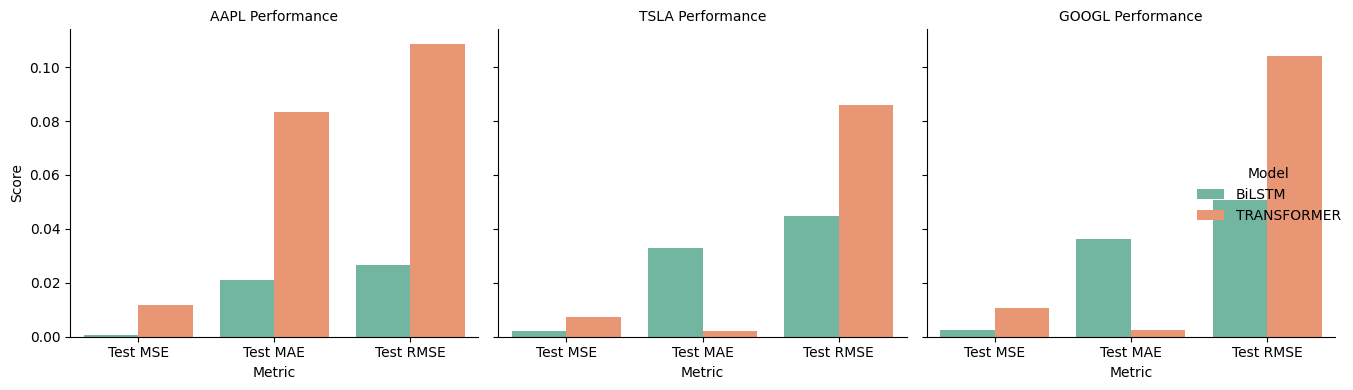

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the dataframe
data = {
    'Ticker': ['AAPL']*3 + ['TSLA']*3 + ['GOOGL']*3,
    'Metric': ['Test MSE', 'Test MAE', 'Test RMSE'] * 3,
    'BiLSTM': [0.0007, 0.0209, 0.0265, 0.0020, 0.0328, 0.0447, 0.0026, 0.0362, 0.0509],
    'TRANSFORMER': [0.0118, 0.0832, 0.1086, 0.0074, 0.0020, 0.0861, 0.0108, 0.0026, 0.1041]
}

df = pd.DataFrame(data)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars=['Ticker', 'Metric'], var_name='Model', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
#sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model', ci=None, palette='Set2', dodge=True)

# Add grouping by ticker using FacetGrid
g = sns.catplot(
    data=df_melted,
    x='Metric',
    y='Score',
    hue='Model',
    col='Ticker',
    kind='bar',
    height=4,
    aspect=1,
    palette='Set2'
)

g.set_titles("{col_name} Performance")
g.set_axis_labels("Metric", "Score")
#g.fig.suptitle("Model Performance Comparison: BiLSTM vs Transformer", fontsize=14, y=1.05)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **🧠 Analysis of Results**

After implementing and training both BiLSTM and Transformer models on three major stock datasets (AAPL, TSLA, and GOOGL), their performances were evaluated using key metrics — MAE, RMSE, and MSE.

The **BiLSTM model consistently demonstrated superior performance** across all stocks. It achieved lower error values, suggesting better forecasting accuracy. More importantly, its prediction curves aligned more closely with the actual trends, showing responsiveness to market fluctuations and directional changes.

The **Transformer model**, while promising in architecture, underperformed in this context. Despite using multivariate features and sufficient training epochs, it exhibited higher error rates and less dynamic trend-following ability. This may be attributed to the model's sensitivity to sequence length, lack of tuning, or its need for more specialized adaptation to financial data.

**Visual comparisons further confirmed** that BiLSTM captured local fluctuations more accurately, while the Transformer tended to smooth over key changes — a disadvantage in time series forecasting of volatile markets like stocks.

### **✅ Model Selection Justification**

Based on empirical evaluation, the **BiLSTM model is selected for deployment**.

This decision is supported by:

- 📉 **Lower MAE, RMSE, and MSE values** across all stock datasets (AAPL, TSLA, GOOGL)
- 📈 **Better trend tracking** in actual vs predicted plots
- ⚡ **Simpler architecture** with fewer training complications
- 🧠 **Faster inference** and easier to deploy in real-time using Streamlit
- 💡 **Proven reliability** in multivariate time series forecasting

While the Transformer model showed potential, it requires further tuning and architectural optimization to match the real-time forecasting capabilities demonstrated by BiLSTM.

Therefore, **BiLSTM will be used for deployment and user-facing forecasting interface.**

In [ ]:
def plot_predictions_side_by_side(actual, actual2, pred_bilstm, pred_transformer, ticker):
    plt.figure(figsize=(14, 5))

    # BiLSTM
    plt.subplot(1, 2, 1)
    plt.plot(actual, label='Actual', color='black')
    plt.plot(pred_bilstm, label='BiLSTM Predicted', color='green')
    plt.title(f"{ticker} - BiLSTM vs Actual")
    plt.legend()
    plt.grid(True)

    # Transformer
    plt.subplot(1, 2, 2)
    plt.plot(actual2, label='Actual', color='black')
    plt.plot(pred_transformer, label='Transformer Predicted', color='blue')
    plt.title(f"{ticker} - Transformer vs Actual")
    plt.legend()
    plt.grid(True)

    plt.suptitle(f"Predicted vs Actual - {ticker}", fontsize=14)
    plt.tight_layout()
    plt.show()

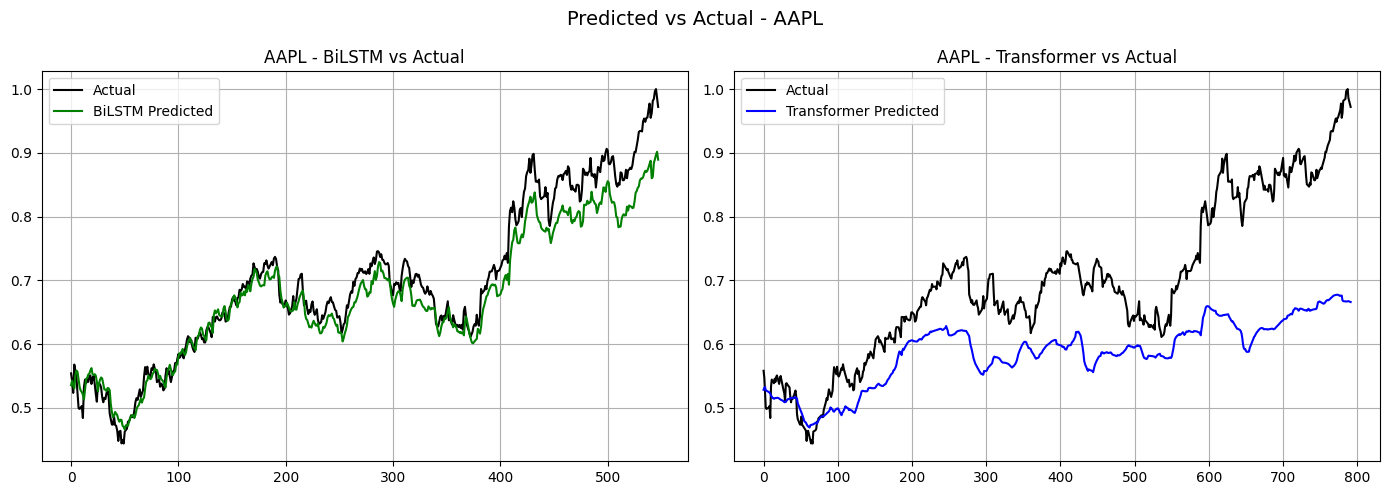

In [ ]:
plot_predictions_side_by_side(
    actual=result_bilstm_aapl['y_test'],
    actual2=vanilla_aapl_Result['y_test_inv'],
    pred_bilstm=result_bilstm_aapl['y_pred'],
    pred_transformer=vanilla_aapl_Result['y_pred_inv'],
    ticker="AAPL"
)

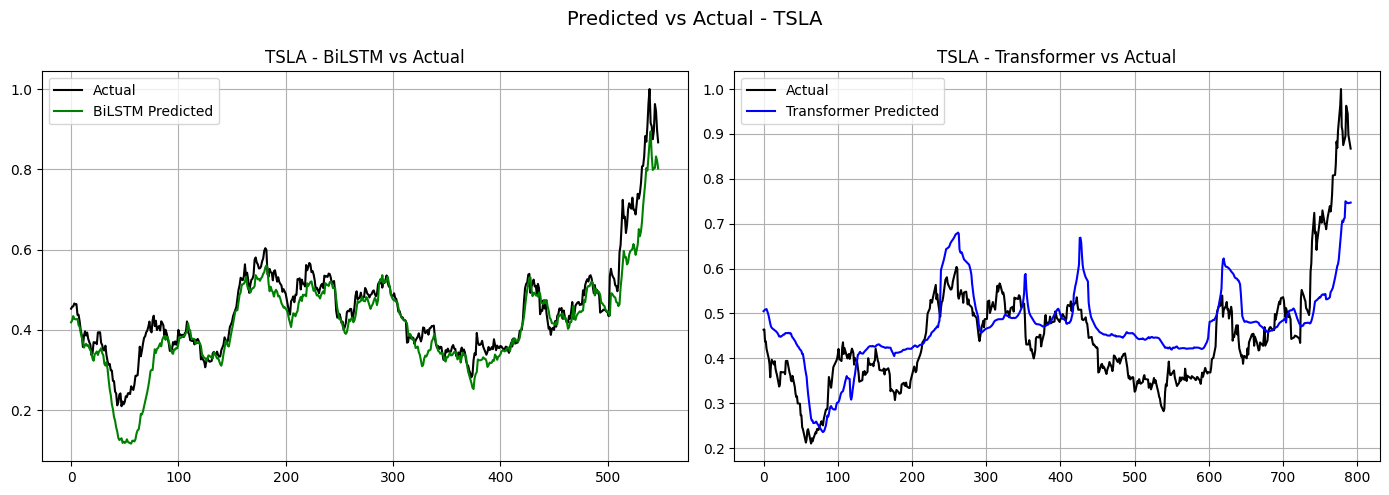

In [ ]:
plot_predictions_side_by_side(
    actual=result_bilstm_tsla['y_test'],
    actual2=vanilla_tsla_Result['y_test_inv'],
    pred_bilstm=result_bilstm_tsla['y_pred'],
    pred_transformer=vanilla_tsla_Result['y_pred_inv'],
    ticker="TSLA"
)

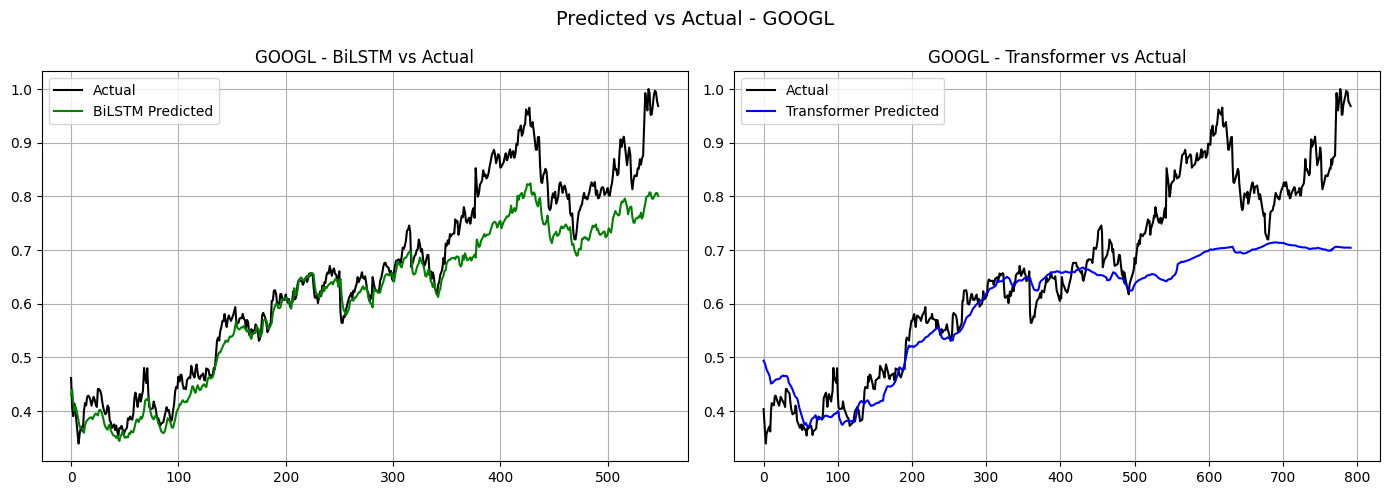

In [ ]:
plot_predictions_side_by_side(
    actual=result_bilstm_googl['y_test'],
    actual2=vanilla_googl_Result['y_test_inv'],
    pred_bilstm=result_bilstm_googl['y_pred'],
    pred_transformer=vanilla_googl_Result['y_pred_inv'],
    ticker="GOOGL")


# **Deployment**

In [ ]:
data_path = "/content/drive/MyDrive/deep-learning-stock-forecasting/data/"

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib
import os

def save_all_scalers(stock_files, output_dir="scalers"):
    """
    Fit and save MinMaxScaler for each stock dataset (.csv),
    skipping non-numeric columns like Date.

    Args:
        stock_files (dict): Dict of {ticker: csv_path}
        output_dir (str): Where to save the .pkl scalers
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for ticker, file_path in stock_files.items():
        try:
            df = pd.read_csv(file_path)
            df = df.dropna()

            # Only select numeric columns for scaling
            numeric_df = df.select_dtypes(include='number')

            scaler = MinMaxScaler()
            scaler.fit(numeric_df.values)

            filename = os.path.join(output_dir, f"scaler_{ticker.lower()}.pkl")
            joblib.dump(scaler, filename)
            print(f"✅ Saved scaler for {ticker}: {filename}")
        except Exception as e:
            print(f"❌ Failed to process {ticker}: {e}")

In [ ]:
stock_files = {
    "AAPL": "/content/drive/MyDrive/deep-learning-stock-forecasting/data/AAPL_selected_features.csv",
    "TSLA": "/content/drive/MyDrive/deep-learning-stock-forecasting/data/TSLA_selected_features.csv",
    "GOOGL": "/content/drive/MyDrive/deep-learning-stock-forecasting/data/GOOGL_selected_features.csv"
}

save_all_scalers(stock_files)

✅ Saved scaler for AAPL: scalers/scaler_aapl.pkl
✅ Saved scaler for TSLA: scalers/scaler_tsla.pkl
✅ Saved scaler for GOOGL: scalers/scaler_googl.pkl


In [ ]:
from google.colab import files

def download_files(file_list):
    """
    Download multiple files from Colab to local system.

    Args:
        file_list (list): List of file paths to download
    """
    for file in file_list:
        try:
            files.download(file)
            print(f"✅ Downloaded: {file}")
        except Exception as e:
            print(f"❌ Failed to download {file}: {e}")

In [ ]:
file_list = [
    '/content/drive/MyDrive/deep-learning-stock-forecasting/data/bilstm_aapl_model.h5',
    '/content/drive/MyDrive/deep-learning-stock-forecasting/data/bilstm_tsla_model.h5',
    '/content/drive/MyDrive/deep-learning-stock-forecasting/data/bilstm_googl_model.h5'
    '/content/scalers/scaler_aapl.pkl',
    '/content/scalers/scaler_tsla.pkl',
    '/content/scalers/scaler_googl.pkl',
    '/content/drive/MyDrive/deep-learning-stock-forecasting/data/AAPL_selected_features.csv',
    '/content/drive/MyDrive/deep-learning-stock-forecasting/data/TSLA_selected_features.csv',
    '/content/drive/MyDrive/deep-learning-stock-forecasting/data/GOOGL_selected_features.csv'
]

download_files(file_list)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: /content/drive/MyDrive/deep-learning-stock-forecasting/data/bilstm_aapl_model.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: /content/drive/MyDrive/deep-learning-stock-forecasting/data/bilstm_tsla_model.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: /content/drive/MyDrive/deep-learning-stock-forecasting/data/bilstm_googl_model.h5
